NUMPY

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
n=200 #numero di step evoluzione temporale
nw=1000 #number of walkers

#random extraction
data=np.random.randint(0,2,[nw,n])
data=data*2-1
print(data)

#distances for each walker
path=np.cumsum(data, axis=1)
print(path)

[[ 1 -1 -1 ... -1 -1  1]
 [-1 -1  1 ...  1 -1  1]
 [ 1  1 -1 ... -1  1 -1]
 ...
 [ 1  1 -1 ...  1  1 -1]
 [ 1  1  1 ... -1 -1  1]
 [ 1 -1 -1 ...  1  1 -1]]
[[  1   0  -1 ...  -6  -7  -6]
 [ -1  -2  -1 ...  -6  -7  -6]
 [  1   2   1 ... -20 -19 -20]
 ...
 [  1   2   1 ...   0   1   0]
 [  1   2   3 ...  -2  -3  -2]
 [  1   0  -1 ...   4   5   4]]


In [15]:
square=path**2
print(square)

mean_square=np.mean(square, axis=0)
print(mean_square)

[[  1   0   1 ...  36  49  36]
 [  1   4   1 ...  36  49  36]
 [  1   4   1 ... 400 361 400]
 ...
 [  1   4   1 ...   0   1   0]
 [  1   4   9 ...   4   9   4]
 [  1   0   1 ...  16  25  16]]
[  1.      1.928   2.96    4.1     5.248   6.14    7.56    9.     10.288
  11.176  12.208  13.224  14.384  15.548  16.672  17.796  18.28   19.404
  20.368  21.048  22.16   23.12   24.224  25.452  25.912  27.484  28.568
  29.548  30.624  31.512  32.544  33.18   34.576  35.32   36.688  37.948
  38.272  39.828  41.16   41.768  41.864  42.78   44.104  44.444  45.576
  46.512  47.752  48.86   50.088  50.292  51.16   51.864  52.648  53.552
  53.84   55.288  56.32   57.188  58.024  59.224  60.592  62.08   63.184
  63.856  65.232  65.724  64.976  65.656  66.68   67.208  67.832  69.016
  69.84   71.72   72.944  73.344  74.208  76.3    77.712  78.964  81.048
  82.872  83.584  83.82   83.832  84.872  85.336  86.664  86.904  87.976
  88.432  89.076  89.712  90.884  92.888  93.576  95.008  95.932  97.184
  98.

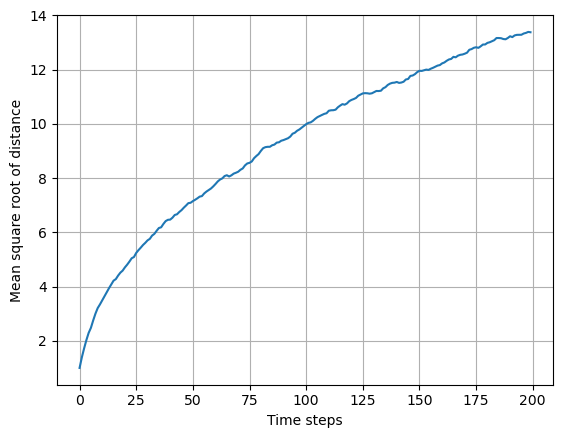

In [22]:
mean_square_root=np.sqrt(mean_square)
time=np.arange(0, n, 1)

#Plot
plt.plot(time, mean_square_root)
plt.xlabel('Time steps')
plt.ylabel('Mean square root of distance')
plt.grid()
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2023-01-02 22:46:09--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2023-01-02 22:46:09--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucc84e8f7c76ca7037112d38cc5d.dl.dropboxusercontent.com/cd/0/inline/Bz1Fx89kP4AlDMJYVJsMLFlxmb3D3JTttT2sr3YFLuA0rKIZOzETU2X4geozf3O9uSAOJAzQ3duuqDFuFxYCy_CYd2bfGS-ekIlwBPZLSwiU4NtVuiai2xyw1K3P3nCxHs2-uWvgqC79bsNvW2aVWIilFednPMB9KYFRT0F7ojTQLQ/file# [segue]
--2023-01-02 22:46:09--  https://ucc84e8f7c76ca7037112d38cc5d.dl.dropboxusercontent.com/cd/0/inline/Bz1Fx89kP4AlDMJYVJsMLFlxmb

In [32]:
! cat "populations.txt"

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


In [26]:
file='populations.txt'
data=np.loadtxt(file)
print(data)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


In [37]:
year=data[:, 0]
hares=data[:, 1]
lynxes=data[:, 2]
carrots=data[:, 3]

print(year)

[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]


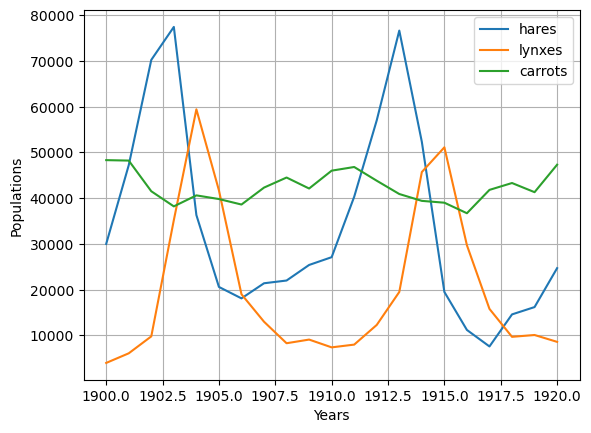

In [47]:
#plot
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(['hares', 'lynxes', 'carrots'])
plt.grid()
plt.xlabel("Years")
plt.ylabel("Populations")
plt.show()

In [53]:
df=pd.DataFrame(data)
pd.DataFrame.describe(df)

,0,1,2,3
count,21.000000,21.000000,21.000000,21.000000
mean,1910.000000,34080.952381,20166.666667,42400.000000
std,6.204837,21413.981859,16655.999920,3404.555771
min,1900.000000,7600.000000,4000.000000,36700.000000
25%,1905.000000,19500.000000,8600.000000,39800.000000
50%,1910.000000,25400.000000,12300.000000,41800.000000
75%,1915.000000,47200.000000,29700.000000,44500.000000
max,1920.000000,77400.000000,59400.000000,48300.000000


In [55]:
#Matrice di covarianza
cov=np.cov(data.T)
print(cov)

[[ 3.85000000e+01 -5.17100000e+04 -2.63000000e+03 -2.88000000e+03]
 [-5.17100000e+04  4.58558619e+08  2.56418333e+07 -1.21050000e+06]
 [-2.63000000e+03  2.56418333e+07  2.77422333e+08 -3.85930000e+07]
 [-2.88000000e+03 -1.21050000e+06 -3.85930000e+07  1.15910000e+07]]


In [78]:
most_populated=[]
for i in data:
    index=np.argmax(i)
    if index==1:
        most_populated.append('hares')
    elif index==2:
        most_populated.append('lynxes')
    else:
        most_populated.append('carrots')

print(most_populated)

['carrots', 'carrots', 'hares', 'hares', 'lynxes', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'hares', 'hares', 'hares', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots']


LINEAR ALGEBRA

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la

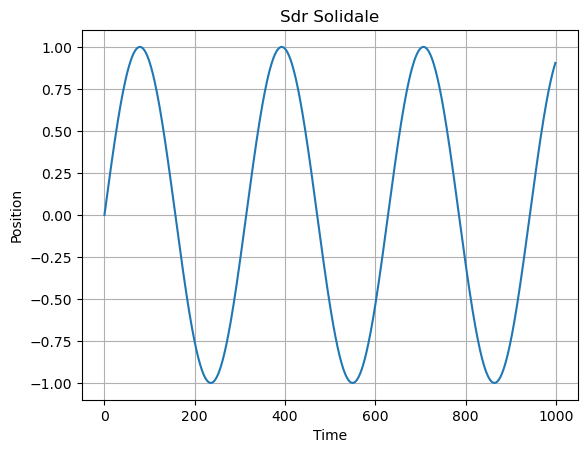

In [46]:
n=10 #number of cameras
time=np.arange(0, 1000, 1) #tempo di evoluzione
omega=0.02 #frequenza
amplitude=1 #ampiezza di oscillazione

x_no_noise=np.sin(time*omega)  #posizione senza il noise

mean=0 #media del rumore
std=0.1 #std del rumore
rumore=noise=np.random.normal(mean, std, len(time)) #rumore

x=x_no_noise #posizione misurata
y=np.zeros(len(time))+rumore
z=np.zeros(len(time))

pos=np.stack([x, y, z], axis=0)

#Plot dell'andamento visto dal sdr solidale
plt.plot(time, x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Sdr Solidale')
plt.grid()
plt.show()


In [47]:
#sampling degli angoli theta e phi delle telecamere
theta=np.random.uniform(0, 2*np.pi, n)
phi=np.random.uniform(0, np.pi, n)

def matrix(theta, phi):
    matrix=np.array([[np.cos(theta)*np.sin(phi), np.cos(theta)*np.cos(phi), -np.sin(theta)*np.sin(phi)],
    [np.sin(theta)*np.sin(phi), np.cos(theta)*np.sin(phi), np.cos(theta)*np.sin(phi)],
    [np.cos(theta), -np.sin(phi), 0]])
    return matrix

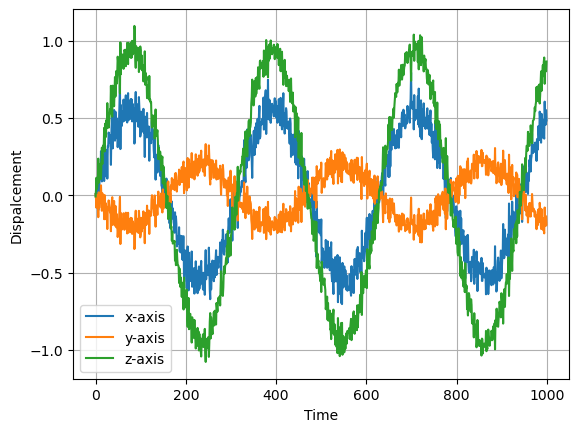

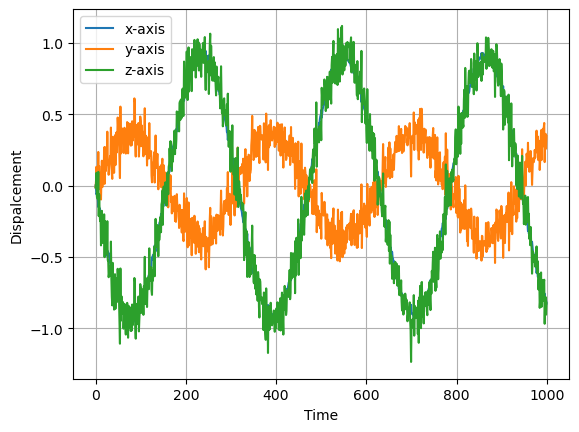

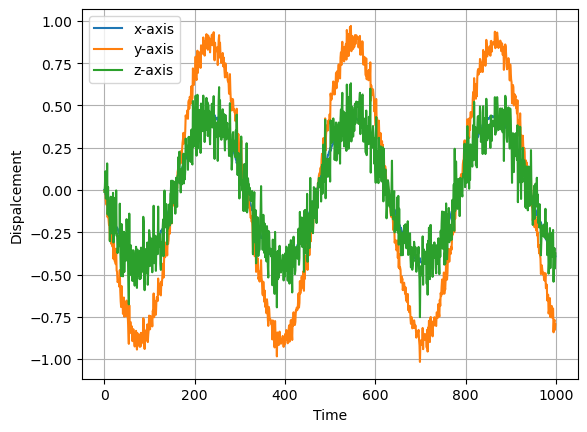

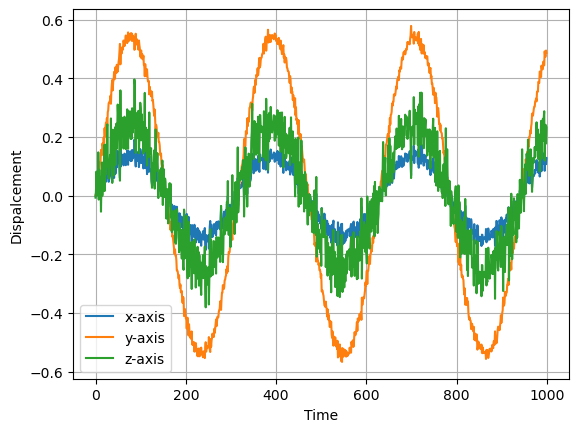

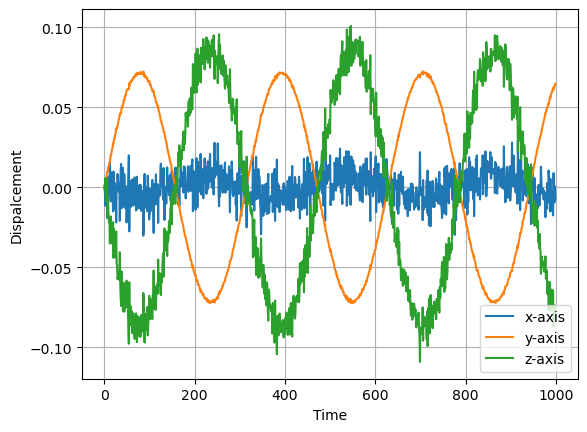

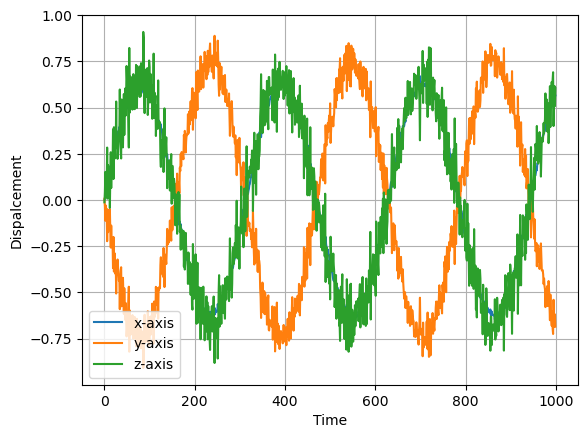

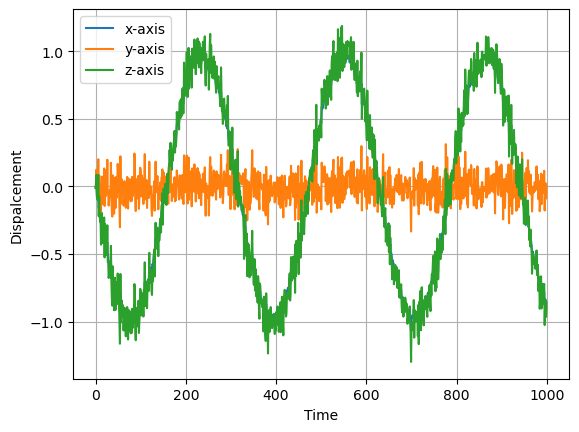

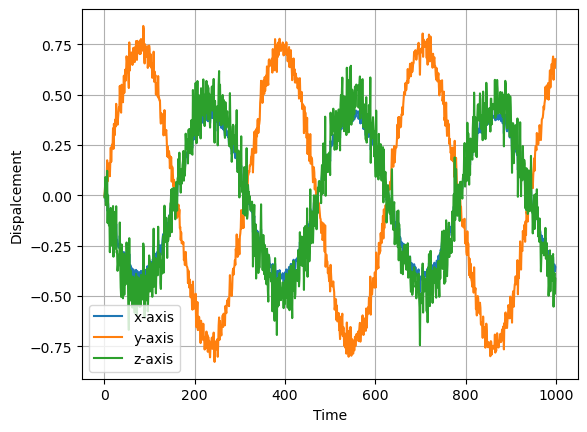

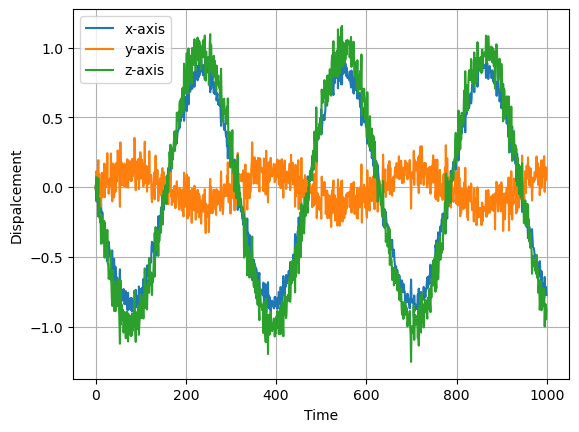

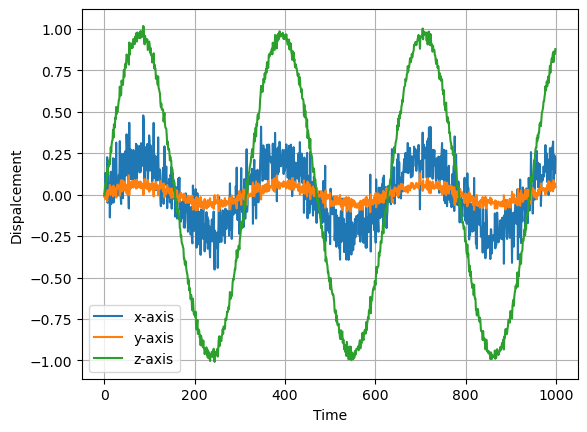

In [48]:
for i in range(n):
    pos_rot=matrix(theta[i], phi[i]).dot(pos)
    plt.figure()
    #mettere un box con i valori di theta e phi
    plt.plot(time, pos_rot[0,:])
    plt.plot(time, pos_rot[1,:])
    plt.plot(time, pos_rot[2,:])
    plt.grid()
    plt.xlabel('Time')
    plt.ylabel('Dispalcement')
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.show
    

Eigenvalues
[6.77685704e-01 6.33847978e-03 1.30497541e-16]
Rotation matrix
[[-0.53018575  0.77713509  0.3390636 ]
 [ 0.63596796  0.10001793  0.76520661]
 [-0.56075647 -0.62133523  0.5472611 ]]
Eigenvalues with SVD
[6.78631451e-01 6.34984070e-03 1.10336172e-32]
Rotation matrix with SVD
[[-0.53030565 -0.77705327  0.3390636 ]
 [ 0.63595252 -0.10011606  0.76520661]
 [-0.56066059  0.62142174  0.5472611 ]]
Trace:
0.6840241839829954
Relevance of the first eigenvector:
0.9907335443342914
[-0.53018575  0.63596796]


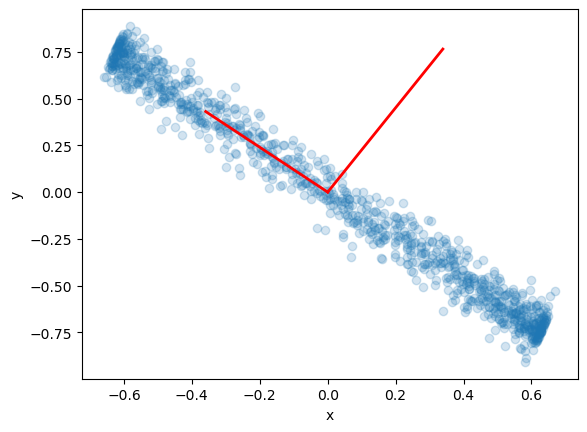

In [97]:
i=n//2 #scelgo una telecamera a caso
X=matrix(theta[i], phi[i]).dot(pos)


#PCA with covariance matrix
cov=np.cov(X)
l, V=np.linalg.eig(cov)
print('Eigenvalues')
print(l)
print('Rotation matrix')
print(V)

#PCA with SVD
U, spectrum, Vt = np.linalg.svd(X)
l_svd = spectrum**2/(len(time)-1)
V_svd = U
print('Eigenvalues with SVD')
print(l_svd)
print('Rotation matrix with SVD')
print(V_svd)

lamda=np.diag(l)
trace=l.sum()
print('Trace:')
print(trace)
print('Relevance of the first eigenvector:')
print(l[0]/trace)
print(V[0:2, 0])

plt.scatter(X[0,:], X[1,:], alpha=0.2)
plt.plot([0, l[0]*V[0, 0]], [0, l[0]*V[1, 0]], 'r-', lw=2)
plt.plot([0, V[0,2]], [0, V[1,2]], 'r-', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [1]:
import pandas as pd
import numpy as np

In [3]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/Scrivania/data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/Scrivania/data 

--2023-01-05 20:52:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 1477391 (1,4M) [application/x-httpd-php]
Salvataggio in: «/home/zenn/Scrivania/data/magic04.data.1»

magic04.data.1      100%[===================>]   1,41M   639KB/s    in 2,3s    

2023-01-05 20:53:02 (639 KB/s) - «/home/zenn/Scrivania/data/magic04.data.1» salvato [1477391/1477391]

--2023-01-05 20:53:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 5400 (5,3K) [application/x-httpd-php]
Salvataggi

In [2]:
file_info='/home/zenn/Scrivania/data/magic04.names'
file_data='/home/zenn/Scrivania/data/magic04.data'

data=pd.read_csv(file_data, delimiter=',')
data.columns=['fLength','fWidth','fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist','class']
data.describe()
X=data.iloc[:,0:10].to_numpy() #change in to a np array without the last column
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
#PCA with SVD
U, spectrum, Vt = np.linalg.svd(X.T)
l_svd = spectrum**2/(len(X)-1)
V_svd = U
print('Eigenvalues with SVD')
print(l_svd)
print('Rotation matrix with SVD')
print(V_svd)

lamda=np.diag(l_svd)
trace=l_svd.sum()

Eigenvalues with SVD
[4.77430116e+04 4.19872795e+03 2.08463422e+03 1.33865811e+03
 8.21443202e+02 4.33686159e+02 1.17368046e+02 5.64091136e-01
 3.48571841e-02 4.22640028e-04]
Rotation matrix with SVD
[[-2.66208735e-01 -2.37034775e-01 -6.48153220e-02  8.45577187e-01
   1.96987003e-01 -2.03127799e-02  3.38390224e-01 -3.87764407e-03
   2.47954718e-03  5.47427658e-05]
 [-1.08401603e-01 -8.28343641e-02  2.48704414e-02  3.16060413e-01
   1.86198249e-02  2.38000121e-02 -9.37935865e-01 -1.40146091e-02
   6.44943435e-03  9.01654429e-05]
 [-1.24912268e-02  1.91925504e-03  1.42281884e-03  8.69099473e-03
  -9.34230025e-03 -2.06422012e-04 -1.18956329e-02  9.82828784e-01
  -1.83179025e-01 -5.18917088e-03]
 [-1.50699595e-03  7.18381249e-04  1.29723959e-03 -1.98124391e-03
  -4.73978215e-03 -8.44504096e-05  2.84061114e-03  1.59869685e-01
   8.43314596e-01  5.13052862e-01]
 [-8.50649080e-04  3.99112059e-04  7.39562162e-04 -1.15812463e-03
  -2.71810252e-03 -4.93195255e-05  1.68937808e-03  8.96153143e-02


In [9]:
print(lamda)
print(trace)
print(l_svd[0:2].sum()/trace) #con le prime due componenti si ha più del 90% di info

[[4.77430116e+04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.19872795e+03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.08463422e+03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.33865811e+03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.21443202e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.33686159e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#Parametri simulazione
seed=100
np.random.seed(seed)
time=10 #secondi di evoluzione
D=0.164*10**(-4) #costante di diffusione in aria
N=1000 #numero di passi
n=3 #numero di traiettorie simulate

#direzione x
x_mean=0
x_std=2*D*time/N
dx=np.random.normal(x_mean, x_std, (N,n))
x=np.cumsum(dx,axis=0)

#direzione y
y_mean=0
y_std=2*D*time/N
dy=np.random.normal(y_mean, y_std, (N,n))
y=np.cumsum(dy, axis=0)

#direzione z
z_mean=0
z_std=2*D*time/N
dz=np.random.normal(z_mean, z_std, (N,n))
z=np.cumsum(dz, axis=0)

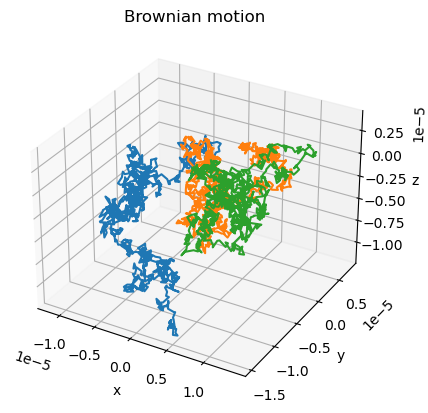

In [40]:
#Plot
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('Brownian motion')

for i in range(n):
   ax.plot(x[:,i],y[:,i],z[:,i])


Number Representetion

1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [25]:
def DecToBin(dec):
    bin=[]
    while(dec>0):
        bin.append(str(dec%2))
        dec=dec//2
    bin.reverse()
    return "".join(bin)

def DecToHex(dec):
    hex=[]
    while(dec>0):
        if dec%16>=10:
            hex.append(chr(dec%16+55))
        else:
            hex.append(str(dec%16))
                       
        dec=dec//16
    hex.reverse()
    return "".join(hex)

def BinToDec(bin):
    dec=0
    i=1
    for element in bin:
        dec=dec+int(element)*(2**(len(bin)-i))
        i+=1
    return dec

def HexToDec(hex):
    dec=0
    i=1
    for element in hex:
        if ord(element)>=60:
            dec=dec+int(ord(element)-55)*(16**(len(hex)-i))
        else:             
            dec=dec+int(element)*(16**(len(hex)-i))
        i+=1
    return dec

def BinToHex(bin):
    return DecToHex(BinToDec(bin))

def HexToBin(hex):
    return DecToBin(HexToDec(hex))

a='01101001'

print(BinToDec(a))


105


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [26]:
# a word is an integer value ritorned by a sensor. 
def WordToFloat2(word):
    
    sgn_mask=2147483648
    exp_mask=2139095040
    man_mask=8388607
    
    sign=(word&sgn_mask)>>31
    exponent=(word&exp_mask)>>23
    mantissa=(word&man_mask)/(2**23)
   
    return  ((-1)**sign)*(1.+mantissa)*2**(exponent-127)

word=int('01000010110010000000000000000000',2)

print(word)

print(WordToFloat2(word))

1120403456
100.0


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [27]:
import math as m

def formula_standard(a,b,c):
    x1=(-b+m.sqrt(b*b-4*a*c))/(2*a)
    x2=(-b-m.sqrt(b*b-4*a*c))/(2*a)
    return x1,x2

def formula_modificata1(a,b,c):
    x1=(2*c)/(-b+m.sqrt(b*b-4*a*c))
    x2=(2*c)/(-b-m.sqrt(b*b-4*a*c))
    return x1,x2

def formula_stabile(a,b,c):
    if b>0:
        x1=(-b-m.sqrt(b*b-4*a*c))/(2*a)
        x2=c/(a*x1)
    elif b<0:
        x1=(-b+m.sqrt(b*b-4*a*c))/(2*a)
        x2=c/(a*x1)
    return x1,x2
        
a=0.001
b=1000
c=0.001

print(formula_standard(a,b,c))
print(formula_modificata1(a,b,c))
print(formula_stabile(a,b,c))

(-9.999894245993346e-07, -999999.999999)
(-1000010.5755125057, -1.000000000001e-06)
(-999999.999999, -1.000000000001e-06)


NUMPY

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [28]:
import numpy as np

In [58]:
def prime_numbers(N):
    m=np.arange(N+1)
    n=np.array(m, dtype=bool)
    for i in range(2,50):
        for j in range(2, int(N/i)+1):
            n[i*j]=False
    print(m[n])
 
prime_numbers(100)

[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [59]:
import numpy as np

In [74]:
matrix=np.random.random(60).reshape(10,6)
print(matrix)

for i in range(10): 
    for j in range(6):
        if(matrix[i,j]<0.1):
            matrix[i,:]=0
              
print(matrix)

[[0.38814569 0.18107922 0.58995108 0.79433331 0.7376636  0.88416495]
 [0.19599957 0.18332417 0.20579815 0.92163561 0.05677552 0.43933877]
 [0.09349548 0.6880159  0.23568789 0.44502516 0.81186499 0.8080735 ]
 [0.02267337 0.07187468 0.33937933 0.61688424 0.40771805 0.10028464]
 [0.2190457  0.47580924 0.84896243 0.50271211 0.91488819 0.6529366 ]
 [0.93681964 0.85881995 0.77116632 0.20787236 0.53499957 0.66730438]
 [0.85826052 0.01865085 0.36365387 0.52930076 0.32784645 0.56363994]
 [0.65855223 0.94202891 0.05740504 0.08980091 0.95670532 0.5199428 ]
 [0.22863545 0.27222665 0.79628325 0.48048133 0.77839315 0.49328274]
 [0.17996654 0.89188697 0.50860917 0.0929338  0.57385244 0.52141423]]
[[0.38814569 0.18107922 0.58995108 0.79433331 0.7376636  0.88416495]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.2190457  0.47580924 0.8489624

OSEMN

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [75]:
import numpy as np

In [81]:
matrix=np.random.random((5,5))
print(matrix)
np.savetxt('/home/zenn/Scrivania/data/matrix.txt', matrix)

[[0.70963287 0.24387109 0.74880029 0.327509   0.29993824]
 [0.09304268 0.28327934 0.12951697 0.47812029 0.79591978]
 [0.81690034 0.15712984 0.74222391 0.24412225 0.69244638]
 [0.53253575 0.77126123 0.47663783 0.51226754 0.01847605]
 [0.07103946 0.04458479 0.16827285 0.8050805  0.6466381 ]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [86]:
filename='/home/zenn/Scrivania/data/matrix.txt'
matrix2=np.loadtxt(filename)
print(matrix)

f=open('/home/zenn/Scrivania/data/matrix.csv', 'w')

for i in range(5):
    for j in range(5):
        if j==4:
            print(matrix2[i,j], file=f)
        else:
            print(matrix2[i,j], end='', file=f)
            print(',', end='', file=f)
f.close()

[[0.70963287 0.24387109 0.74880029 0.327509   0.29993824]
 [0.09304268 0.28327934 0.12951697 0.47812029 0.79591978]
 [0.81690034 0.15712984 0.74222391 0.24412225 0.69244638]
 [0.53253575 0.77126123 0.47663783 0.51226754 0.01847605]
 [0.07103946 0.04458479 0.16827285 0.8050805  0.6466381 ]]


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [87]:
with open('credit_card.dat', mode='rb') as file: # b is important -> binary
    fileContent = file.readlines()

    
for line in fileContent:
    print('\n')
    for i in range(int((len(line)-4)/6)):
        print(chr(int(line[i*6:(i*6+6)],2)), end='') 



7648 5673 3775 2271

3257 8247 3354 2266

2722 0001 4011 6652

0661 3063 3742 3150

0432 1608 1462 4742

5827 2027 8785 7303

5774 8528 2087 1117

8140 1210 6352 2845

5764 1133 7301 7100

6456 1737 4126 6726

1228 8631 7382 0000

7051 0160 5374 3166

0618 3587 1630 6376

1545 5454 7444 5636

6735 3116 3202 6834

7287 5011 1547 8413

7033 2607 3328 4200

2568 5244 1874 5024

1684 2253 7570 7118

0672 2576 0575 6631

6332 8353 8787 1340

1813 3361 1175 4211

2477 6450 8840 2368

5512 3505 2563 1326

3083 7882 0621 0025

4521 5148 8045 0334

7563 3654 8713 5787

8324 2664 0476 5561

0565 2504 7168 3510

5107 5507 1767 0738

2462 1821 2448 1443

2788 0638 6861 6554

5851 5873 5474 0547

0670 1004 4013 2655

5874 5506 3048 0806

2805 5401 8462 1260

5083 8406 6310 1862

1076 1445 3013 2266

8440 4804 4844 5277

4758 6141 0686 1387

7586 0675 0315 2568

2544 1258 7432 5165

3474 5023 4434 5626

1410 0270 0434 5086

7315 4446 1104 4215

0224 7742 8300 0266

0170 2700 3145 0640

2006 2437 8

VISUALIZATION

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

LINEAR ALGEBRA

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.
